# MTGA Rarity Analysis
##### By Jacob Corum

## Background

I have loved the game Magic The Gathering Arena for many months now and honestly I can tell you that I believe that the implications of MTGA will put Wizards of the Coast on the map for decades to come. As a player I enjoy the lootcrate feel to the game, free to play essentially, anything extra is of course an extra fee, but not too much. The game has removed the direct money for cards aspect of the original game with a third step, gems, that makes me feel better about spending massive amounts on cards and the semi random aspect ensures that I will be coming back, a lot. Yet the game has something wanting in its ability to satisfy the need to beat the tar out of other players with perfectly crafted decks. If Magic the Gathering Arena was meant to remove the pain of buying incredibly expensive cards and deliver a better experinece then there is something left to be said for their ecosystem, namely gems and wildcards because for the present it is blatantly obvious to me the selling point of buying gems other than that they are fun to buy is the fact that if i don't then I am going to have to collect gold wild cards for a very long time. 

## Introduction

I did a bit of research to see if Wizards of the Coast had come out with a statement that could explain the phenomena that I was experiencing. I found a statement (albeit the source is unchecked) that stated that players will need an average of 7 mythic, 23 rares, and therefore an average of 120 packs to build a professional deck. Though this seemed fair to me, I am also a man of science and dont trust huristics, and without data provided to test I had to go find some. I scraped mtgtop8.com for the decklists of about 1000 players, and then merged that with data on card attributes from mtgjson.com. What resulted was a dataset that described how many cards of each rarity are in each professional player's deck. 

## Analysis

The violin plot below shows all four rarities on the x axis and the number of that rarity on the y axis. The area of the violin shapes correlate with how many decks have that number of rarity in it. For example: the violin shape with the label "Rare" underneath it has one thick portion on top, then gets skinnier, and then gets wide on the bottom again. This means that a lot of decks have about 35 rares, fewer have 30, but a lot have about 25. The three dotted lines in the violins represent quartiles in the data, meaning that the middle dotted line represents the median. 

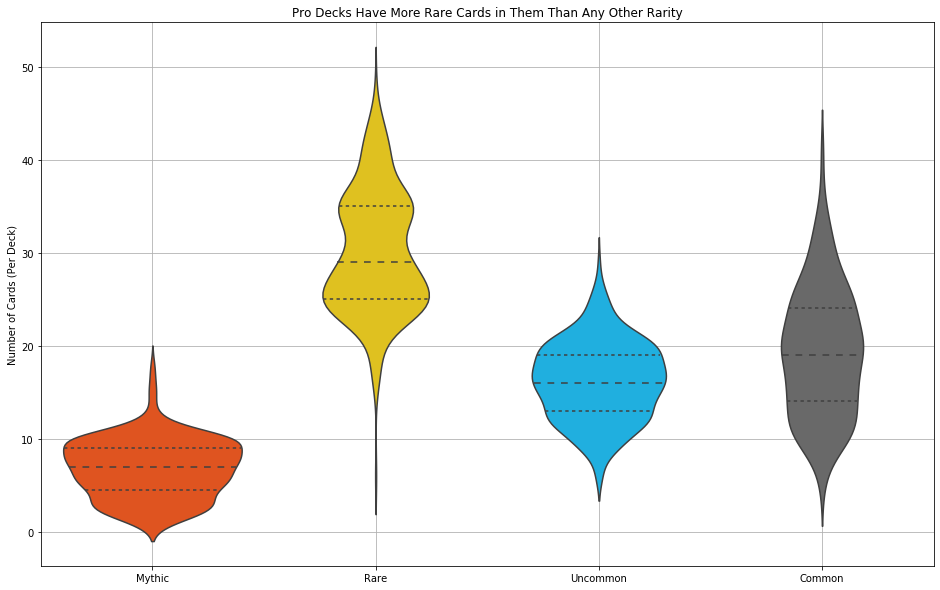

In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

decks_clean = pd.read_csv('/home/steadyjingo/Documents/MTGA_rarity_analysis/data/decks_clean.csv')

colors = ['orangered', 'gold', 'deepskyblue', 'dimgrey']
custom_pallette = sns.set_palette(sns.color_palette(colors))
fig = plt.figure(figsize=[16, 10])
ax = fig.add_subplot(1, 1, 1)
ax.set_axisbelow(True)
sns.violinplot(x='card_rarity', y='num', data=df_rarities, palette=custom_pallette, inner='quartile')
plt.grid()
plt.title('Pro Decks Have More Rare Cards in Them Than Any Other Rarity')
plt.ylabel('Number of Cards (Per Deck)')
plt.xlabel('');

This graphic would suggest that players on average actually use 30 rares in their decks rather than 23 assuming that all professional decks are recorded on mtgtop8.com. But since there are probably some that do not I used a bootstrap method to see if this sample can apply to 

In [ ]:
means = []
for _ in range(1000):
    boot = df_rarities.sample(200, replace=True)
    boot_mean = boot[boot.card_rarity == 'Rare']

In [40]:
df_rarities = df_rarities.melt(value_vars=['mythic', 'rare', 'uncommon', 'common'], value_name='num')

In [24]:
df_rarities.card_rarity = df_rarities.card_rarity.replace('mythic', 'Mythic').replace('rare', 'Rare').replace('uncommon', 'Uncommon').replace('common', 'Common')